In [1]:
X = [1000, 1500, 1200]
Y = [20, 35, 30]

In [2]:
import sympy as sp

In [3]:
a, b = sp.symbols("a b")

In [4]:
sum = 0
for x,y in zip(X,Y):
    sum += (a*x+b -y)**2

In [5]:
sum

(1000*a + b - 20)**2 + (1200*a + b - 30)**2 + (1500*a + b - 35)**2

In [6]:
sp.simplify(sum)

4690000*a**2 + 7400*a*b - 217000*a + 3*b**2 - 170*b + 2525

In [7]:
sp.diff(sum,a)

9380000*a + 7400*b - 217000

In [8]:
sp.diff(sum, b)

7400*a + 6*b - 170

In [9]:
import numpy as np

In [10]:
X = np.linspace(-20, 20, 101)

In [11]:
Y = 3*X+5 + np.random.randn(101)*10

In [12]:
import matplotlib.pyplot as plt

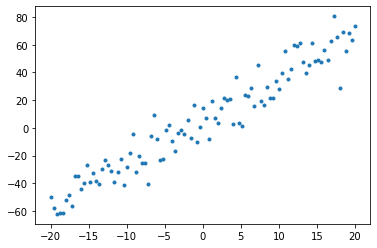

In [13]:
plt.plot(X, Y, ".")

In [14]:
A = np.vstack([X, np.ones_like(X)]).T

In [15]:
ATA = A.T@A
ATA

array([[1.37360000e+04, 4.26325641e-14],
       [4.26325641e-14, 1.01000000e+02]])

In [16]:
ATY = A.T@Y
ATY

array([42383.94974303,   534.94362192])

In [17]:
theta = np.linalg.solve(ATA, ATY)
theta

array([3.08561079, 5.2964715 ])

In [18]:
a, b = theta

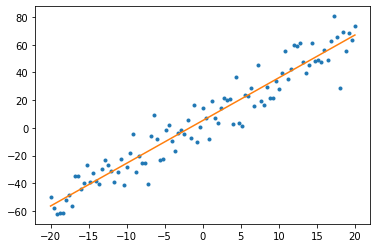

In [19]:
plt.plot(X, Y, ".")
plt.plot(X, a*X+b)

In [34]:
Y = 0.5*X**2+5*X-4 + np.random.randn(101)*100

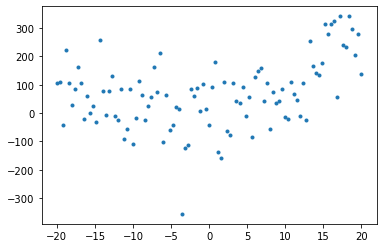

In [35]:
plt.plot(X, Y, ".")

In [36]:
mask = np.random.rand(101)>0.5
mask

array([False,  True, False, False,  True, False, False,  True, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False,  True,  True, False,
        True, False, False, False, False, False,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True])

In [37]:
X_train = X[mask]
Y_train = Y[mask]

In [38]:
rmask = np.invert(mask)
X_test = X[rmask]
Y_test = Y[rmask]

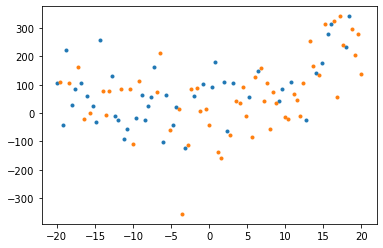

In [40]:
plt.plot(X_test, Y_test, ".")
plt.plot(X_train, Y_train, ".")

In [41]:
def regression(X, Y, n):
    A = [X**i for i in range(n, -1, -1)]
    A = np.vstack(A).T
    theta = np.linalg.solve(A.T@A,A.T@Y)
    return theta

In [81]:
def ridge_regression(X, Y, n, lambda_):
    A = [X**i for i in range(n, -1, -1)]
    A = np.vstack(A).T

    ATA = A.T@A
    I = np.identity(ATA.shape[0])
    theta = np.linalg.solve(ATA+lambda_*I,A.T@Y)
    return theta

In [43]:
theta = regression(X, Y, 2)
theta

array([0.49612895, 3.93507665, 2.4579716 ])

In [82]:
ridge_regression(X, Y, 2, 1)

array([0.49634749, 3.93479019, 2.40444369])

In [44]:
def predict(X, theta):
    n = len(theta)

    sum = np.zeros_like(X, dtype=float)
    for i in range(n):
        j = n - i -1
        sum += theta[i]*X**j

    return sum

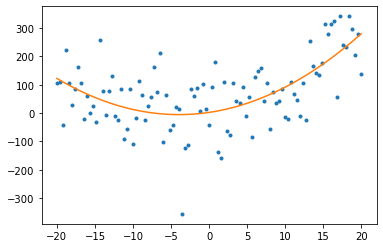

In [45]:
plt.plot(X, Y, ".")
plt.plot(X, predict(X, theta))


In [48]:
def loss(X, Y, theta):
    Y_hat = predict(X, theta)
    E = Y-Y_hat
    return (E**2).sum()/len(E)

In [49]:
loss(X, Y, theta)

8715.507154724894

Text(0.5, 1.0, 'Polynomial Regression')

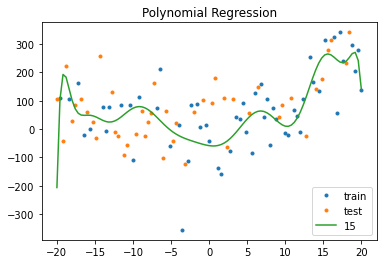

In [80]:
plt.plot(X_train, Y_train, ".", label="train")
plt.plot(X_test, Y_test, ".", label="test")

for n in [15]:
    theta = regression(X_train, Y_train, n)
    Y_hat = predict(X, theta)
    plt.plot(X, Y_hat, label=str(n))

plt.legend()
plt.title("Polynomial Regression")

In [70]:
def loss_on_train(n):
    theta = regression(X_train, Y_train, n)
    return loss(X_train, Y_train, theta)

def loss_on_test(n):
    theta = regression(X_train, Y_train, n)
    return loss(X_test, Y_test, theta)

(0.0, 10000.0)

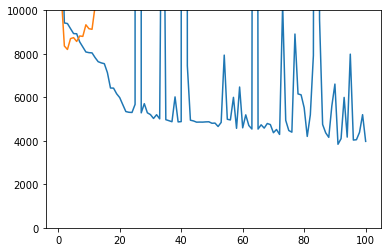

In [78]:
losses = [loss_on_train(n) for n in range(1, 101)]
plt.plot(range(1, 101), losses)
losses = [loss_on_test(n) for n in range(1, 101)]
plt.plot(range(1, 101), losses)

#plt.yscale("log")
plt.ylim([0, 10000])

In [68]:
losses[-1]

3975.4468897882034

Text(0.5, 1.0, 'Ridge Regression')

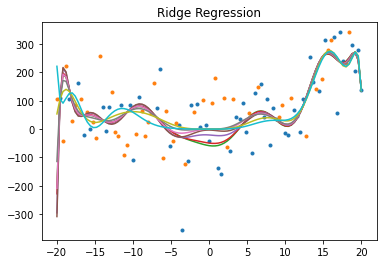

In [90]:
plt.plot(X_train, Y_train, ".", label="train")
plt.plot(X_test, Y_test, ".", label="test")

n = 15
theta = regression(X_train, Y_train, n)
Y_hat = predict(X, theta)
plt.plot(X, Y_hat, label=str(n))

lambdas = [1, 10, 100, 1000, 10000,1000000, 10000000]
for l in lambdas:
    theta = ridge_regression(X_train, Y_train, n, l)
    plt.plot(X, predict(X, theta), label=r"$\lambda$="+str(l))

#plt.legend()
plt.title("Ridge Regression")